<a href="https://colab.research.google.com/github/MBSingh2038/LinearRegression/blob/main/linear_regression_project_Bike_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read CSV file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/SeoulBikeData.csv")
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
data.shape

(8760, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [6]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
#Extracting dataframe for only numbers
df_data_numbers = data.select_dtypes(include = ['int64', 'float64'])
df_data_numbers.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [8]:
df_data_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


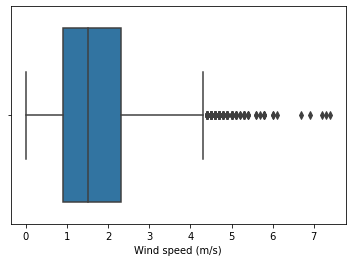

In [9]:
sns.boxplot(df_data_numbers['Wind speed (m/s)'])

In [10]:
Q1 = np.percentile(df_data_numbers['Wind speed (m/s)'],25,interpolation='midpoint')
Q2 = np.percentile(df_data_numbers['Wind speed (m/s)'],50,interpolation='midpoint')
Q3 = np.percentile(df_data_numbers['Wind speed (m/s)'],75,interpolation='midpoint')
IQR = Q3 -Q1
low_lim = Q1 -1.5*IQR
up_lim = Q3 + 1.5 *IQR
print(low_lim)
print(up_lim)

-1.1999999999999997
4.3999999999999995


In [11]:
df_data_numbers = df_data_numbers[df_data_numbers['Wind speed (m/s)']< up_lim]
df_data_numbers = df_data_numbers[df_data_numbers['Wind speed (m/s)']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


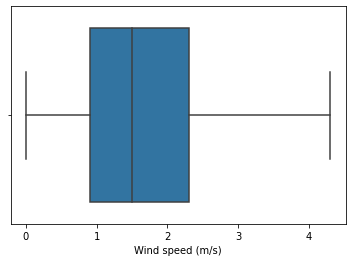

In [12]:
sns.boxplot(df_data_numbers['Wind speed (m/s)'])

In [25]:
df_data_numbers.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


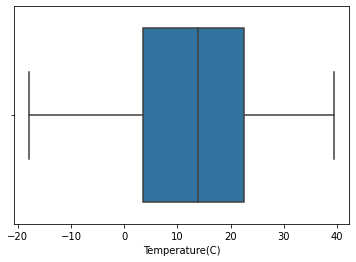

In [26]:
sns.boxplot(df_data_numbers['Temperature(C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


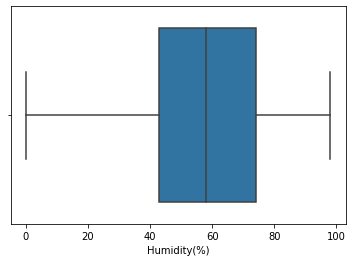

In [27]:
sns.boxplot(df_data_numbers['Humidity(%)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


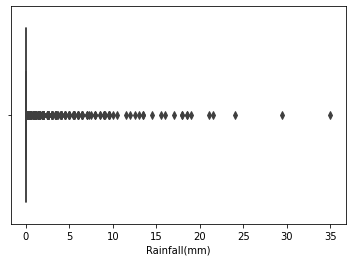

In [28]:
sns.boxplot(df_data_numbers['Rainfall(mm)'])

In [29]:
Q1 = np.percentile(df_data_numbers['Rainfall(mm)'],25,interpolation='midpoint')
Q2 = np.percentile(df_data_numbers['Rainfall(mm)'],50,interpolation='midpoint')
Q3 = np.percentile(df_data_numbers['Rainfall(mm)'],75,interpolation='midpoint')
IQR = Q3 -Q1
low_lim = Q1 -1.5*IQR
up_lim = Q3 + 1.5 *IQR
print(low_lim)
print(up_lim)

0.0
0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


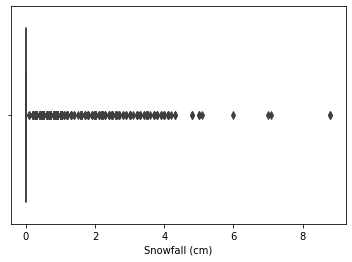

In [30]:
sns.boxplot(df_data_numbers['Snowfall (cm)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


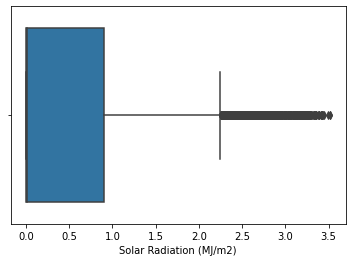

In [31]:
sns.boxplot(df_data_numbers['Solar Radiation (MJ/m2)'])

In [32]:
Q1 = np.percentile(df_data_numbers['Solar Radiation (MJ/m2)'],25,interpolation='midpoint')
Q2 = np.percentile(df_data_numbers['Solar Radiation (MJ/m2)'],50,interpolation='midpoint')
Q3 = np.percentile(df_data_numbers['Solar Radiation (MJ/m2)'],75,interpolation='midpoint')
IQR = Q3 -Q1
low_lim = Q1 -1.5*IQR
up_lim = Q3 + 1.5 *IQR
print(low_lim)
print(up_lim)

-1.35
2.25


In [33]:
df_data_numbers = df_data_numbers[df_data_numbers['Solar Radiation (MJ/m2)']< up_lim]
df_data_numbers = df_data_numbers[df_data_numbers['Solar Radiation (MJ/m2)']> low_lim]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


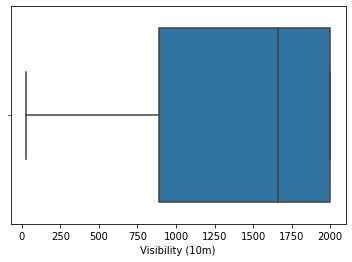

In [36]:
sns.boxplot(df_data_numbers['Visibility (10m)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


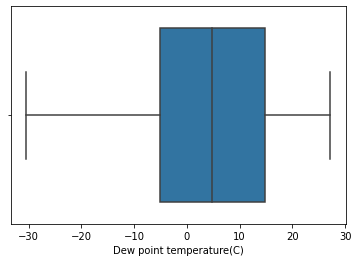

In [38]:
sns.boxplot(df_data_numbers['Dew point temperature(C)'])

In [13]:
df_data_numbers.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000
mean,707.892662,11.447726,12.983521,58.513316,1.665740,1432.626003,4.249192,0.557100,0.148587,0.074916
std,647.385534,6.954110,11.926253,20.266445,0.947656,609.239383,12.984459,0.861059,1.129512,0.439490
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.500000,0.000000,0.000000,0.000000
25%,192.000000,5.000000,3.600000,43.000000,0.900000,932.000000,-4.400000,0.000000,0.000000,0.000000
50%,510.000000,11.000000,13.800000,58.000000,1.500000,1687.000000,5.300000,0.010000,0.000000,0.000000
75%,1069.000000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.950000,0.900000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,4.300000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [14]:
df_data_numbers.isna().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

In [15]:
#Constructing correlation matrix
data_corr = df_data_numbers.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.415177,0.537405,-0.205049,0.150896,0.200895,0.378650,0.264717,-0.123076,-0.140847
Hour,0.415177,1.000000,0.128315,-0.240293,0.289811,0.097055,0.007803,0.144596,0.007647,-0.020185
Temperature(C),0.537405,0.128315,1.000000,0.150682,-0.013465,0.041172,0.912907,0.363061,0.048435,-0.217741
Humidity(%),-0.205049,-0.240293,0.150682,1.000000,-0.329534,-0.538682,0.529182,-0.455914,0.235632,0.108859
Wind speed (m/s),0.150896,0.289811,-0.013465,-0.329534,1.000000,0.167182,-0.153652,0.327953,-0.022553,-0.005046
Visibility (10m),0.200895,0.097055,0.041172,-0.538682,0.167182,1.000000,-0.168780,0.142566,-0.165679,-0.121728
Dew point temperature(C),0.378650,0.007803,0.912907,0.529182,-0.153652,-0.168780,1.000000,0.106464,0.123775,-0.151155
Solar Radiation (MJ/m2),0.264717,0.144596,0.363061,-0.455914,0.327953,0.142566,0.106464,1.000000,-0.072957,-0.071106
Rainfall(mm),-0.123076,0.007647,0.048435,0.235632,-0.022553,-0.165679,0.123775,-0.072957,1.000000,0.008838
Snowfall (cm),-0.140847,-0.020185,-0.217741,0.108859,-0.005046,-0.121728,-0.151155,-0.071106,0.008838,1.000000


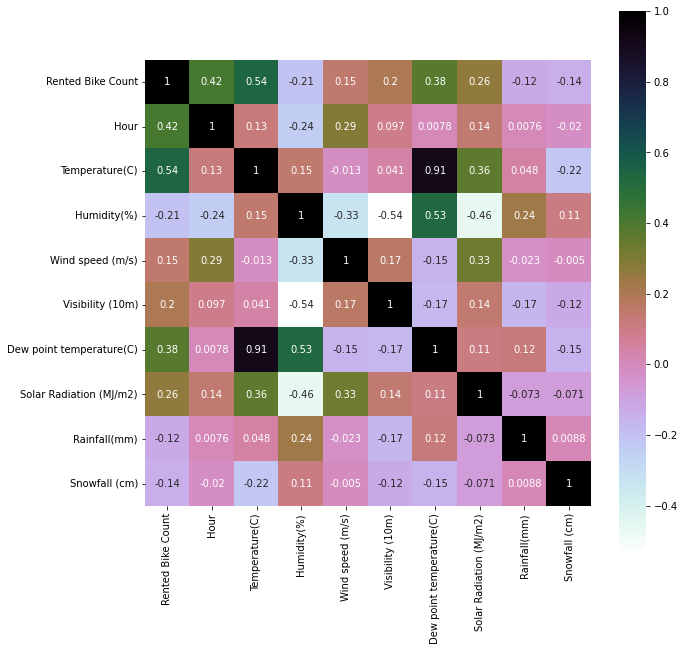

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_data_numbers, test_size = 0.25)

In [18]:
df_data_numbers.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [19]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count'] 

In [20]:
val_x.columns

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [21]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)

In [34]:
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 349.4802275127794
Mean Square Error of linear regression: 221252.84134601953
R_Squared Score of linear regression: -0.09738333685302969


In [35]:
ln_reg.score(val_x,val_y)

0.4812491288858798

In [39]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_x, train_y)
lasso_score=lasso.score(val_x, val_y)
print('accuracy using lasso:',lasso_score)

accuracy using lasso: 0.4815369171999243


In [40]:
from sklearn.linear_model import Ridge
df_ridge = Ridge()
df_ridge.fit(train_x, train_y)
ridge_score = df_ridge.score(val_x, val_y)
print("Accuracy using Ridge = ", ridge_score)

Accuracy using Ridge =  0.4812516126476175
